# Sprint21 自然言語処理

# データセットについて
IMDBはInternet Movie Databaseの略で、映画のデータベースサイトです。このサイトではユーザが映画に対して1から10点の評価とコメントを投稿することができます。そのデータベースから訓練データは25000件、テストデータは25000件のデータセットを作成しています。

https://www.imdb.com/

In [1]:
#データロード
#'/Users/kazuya99986/Downloads'に保存

from sklearn.datasets import load_files

# !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz # IMDBをカレントフォルダにダウンロード

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

print(train_review.target_names)

['neg', 'pos']


In [2]:
print("x : {}".format(x_train[1]))

x : Words can't describe how bad this movie is. I can't explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won't list them here, but just mention the coloring of the plane. They didn't even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you're choice over this one, even the "Turbulence"-movies a

In [3]:
#3文の最初の5単語を定義
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b') #単語の出現頻度をカウント
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

#3行目までに、mini_datasetで定義した単語がいくつ出てくるかをカウント
#1-gram (unigram)※単語を単体で使い、まとめないこと

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [5]:
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

#2gram (bigram) ※単語を2つにまとめること

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


# 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。

In [6]:
#
#1-gram (unigram)
#

import numpy as np

word_list =np.array([['This', 'movie', 'is', 'SOOOO', 'funny'],
                    ['What','a', 'movie', 'I', 'never'],
                    ['best', 'movie', 'ever', 'this', 'movie']])
unigram = np.unique(word_list)

In [7]:
result = np.zeros((len(word_list), len(unigram)))

for i in range(len(word_list)):
    for j in range(len(word_list[i])):
        result[i][ np.where(unigram == word_list[i][j]) ] += 1

result = pd.DataFrame(result, columns=unigram)
result

,I,SOOOO,This,What,a,best,ever,funny,is,movie,never,this
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0


In [8]:
#
#2-gram (bigram) 
#

temp = np.array([])

for i in range(word_list.shape[0]):
    for j in range(word_list.shape[1] - 1):
        temp = np.append(temp, word_list[i, j] + ' ' + word_list[i, j + 1] )
bigram = np.unique(temp)

bigram

array(['I never', 'SOOOO funny', 'This movie', 'What a', 'a movie',
       'best movie', 'ever this', 'is SOOOO', 'movie I', 'movie ever',
       'movie is', 'this movie'], dtype='<U32')

In [9]:
result_2 = np.zeros((len(word_list), len(bigram)))

for i in range(len(word_list)):
    for j in range(len(word_list[i]) - 1):
        result_2[i][ np.where(bigram == (word_list[i, j] + ' ' + word_list[i, j+1] ) ) ] += 1

result_2 = pd.DataFrame(result_2, columns=bigram)
result_2

,I never,SOOOO funny,This movie,What a,a movie,best movie,ever this,is SOOOO,movie I,movie ever,movie is,this movie
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


# Term Frequency(TF)
単語の出現頻度。計算はBoWと同様
$$tf(t,d) = \frac{n_{t,d}}{\sum_{s \in d}n_{s,d}}$$
分母: サンプルd内のトークンtの出現回数（BoWと同じ）<br>
分子：サンプルdの全トークンの出現回数の和

# Inverse Document Frequency(IDF)
IDFはそのトークンがデータセット内で珍しいほど値が大きくなる指標
$$idf(t) = \log{\frac{N}{df(t)}}$$
分母：　トークンtが出現するサンプル数<br>
分子：サンプル数

# TF-IDF
$$tfidf(t, d) = tf(t, d) \times idf(t)$$

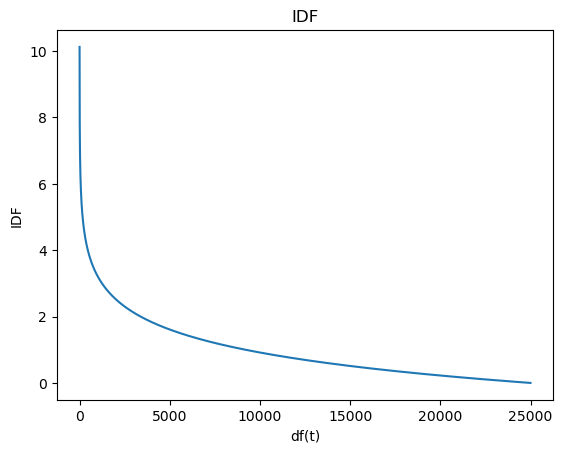

In [10]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

# ストップワード
あまりにも頻繁に登場するトークンは、値を小さくするだけでなく、取り除くという前処理を加えることもあります。取り除くもののことを ストップワード と呼びます。既存のストップワード一覧を利用したり、しきい値によって求めたりします

In [11]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [12]:
#NTK: 代表的な既存のストップワード一覧のライブラリ
import nltk
# stop_words = nltk.download('stopwords')　# はじめて使う場合はストップワードをダウンロード

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

# 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。

In [13]:
#データ初期化
# x_train, y_train = train_review.data, train_review.target
# x_test, y_test = test_review.data, test_review.target

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000) #vocabulary=stop_words
x_train = vectorizer.fit_transform(x_train)
# x_train = pd.DataFrame(x_train, columns=vectorizer.get_feature_names())

In [15]:
x_train.toarray()
x_train.shape

(25000, 5000)

In [16]:
vectorizer = TfidfVectorizer(max_features=5000) #vocabulary=stop_words
x_test = vectorizer.fit_transform(x_test)

x_test.toarray()
x_test.shape

(25000, 5000)

In [17]:
df_tfidf = pd.DataFrame(x_test.toarray(), columns=vectorizer.get_feature_names())
display(df_tfidf)

,00,000,10,100,11,12,13,13th,14,15,...,younger,your,yourself,youth,zellweger,zero,zoey,zombie,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.052195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.052327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)
Y_pred = tree.predict(x_test)
print(f'acc : {accuracy_score(y_test, Y_pred):.2%}')

#yは2値、 4点以下のレビューが0、7点以上のレビューが1、5点と6点の中立的なレビューはそもそもデータに含めず

acc : 57.26%


# 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

In [19]:
#ノーマルTF-IDF
class Normal_TfidfVectorizer:
    def __init__(self, token_pattern, vocabulary):
        self.token_pattern = token_pattern
        self.vocabulary = vocabulary
        pass
        
    def fit(self, text):
        
        #前処理
        words = []

        for i in range(len(text)):
            #小文字変換
            text[i] = (text[i].lower())
            #ピリオド、ビックリ削除
            text[i] = text[i].replace('.', '').replace('!', '')
            #キーワード毎に区切り
            words.append(text[i].split(' '))

        words_uni = np.unique(words)
        self.features = words_uni
        words_num = [sum(len(v) for v in words)]

        #TF
        result = np.zeros((len(text), len(words_uni)))

        for i in range(len(words)):
            for j in range(len(words[i])):
                result[i][ np.where(words_uni == word_list[i][j]) ] += 1

        term_frequency = result / words_num



        #IDF
        idf = np.zeros((1, len(words_uni)))

        for i in range(len(words_uni)):
            for j in range(len(text)):
                if  words_uni[i] in words[j]:
                    idf[:,i] += 1
        
        idf = np.log(len(text) / idf)
        
        #TF-IdF
        tf_idf =  term_frequency * idf
        
        return tf_idf



text = ['This movie is SOOOO funny!!!',
       'What a movie! I never',
       'best movie ever!!!!! this movie']


a = Normal_TfidfVectorizer(token_pattern=None, vocabulary=None)
tf_idf = a.fit(text)

tf_idf = pd.DataFrame(tf_idf, columns=a.features)
display(tf_idf)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,0.073241,0.0,0.073241,0.0,0.000000,0.0,0.000000,0.0
1,0.073241,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.073241,0.0,0.000000,0.0
2,0.000000,0.073241,0.073241,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.027031,0.0


In [20]:
#sk-learn版TF-IDF
class Sk_TfidfVectorizer:
    def __init__(self, token_pattern, vocabulary):
        self.token_pattern = token_pattern
        self.vocabulary = vocabulary
        pass
        
    def fit(self, text):
        
        #前処理
        words = []

        for i in range(len(text)):
            #小文字変換
            text[i] = (text[i].lower())
            #ピリオド、ビックリ削除
            text[i] = text[i].replace('.', '').replace('!', '')
            #キーワード毎に区切り
            words.append(text[i].split(' '))

        words_uni = np.unique(words)
        self.features = words_uni
        words_num = [sum(len(v) for v in words)]

        #TF
        result = np.zeros((len(text), len(words_uni)))

        for i in range(len(words)):
            for j in range(len(words[i])):
                result[i][ np.where(words_uni == word_list[i][j]) ] += 1

        term_frequency = result #sk-learnはwords_numで割らない



        #IDF
        idf = np.zeros((1, len(words_uni)))

        for i in range(len(words_uni)):
            for j in range(len(text)):
                if  words_uni[i] in words[j]:
                    idf[:,i] += 1
        
        idf = np.log(len(text) / idf)
        
        #TF-IdF
        tf_idf =  term_frequency * idf
        
        return tf_idf



b = Sk_TfidfVectorizer(token_pattern=None, vocabulary=None)
sk_tf_idf = b.fit(text)

sk_tf_idf = pd.DataFrame(sk_tf_idf, columns=a.features)
display(sk_tf_idf)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.098612,0.0,1.098612,0.0,0.000000,0.0,0.000000,0.0
1,1.098612,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.098612,0.0,0.000000,0.0
2,0.000000,1.098612,1.098612,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.405465,0.0


# Gensim ライブラリ
gensimは、CBoW　× negative samplingを用いたword2vec

In [150]:
from gensim.models import Word2Vec

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]

model = word2vec.Word2Vec(sentences, vector_size=10, min_count=1)
# model = Word2Vec(min_count=1, vector_size=10) # 次元数を10に設定 size=10
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=5) # 学習

print("語彙の一覧 : {}".format(model.wv.key_to_index))
for vocab in model.wv.key_to_index:
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

2021-08-26 16:07:48,550 : INFO : collecting all words and their counts
2021-08-26 16:07:48,552 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-08-26 16:07:48,553 : INFO : collected 8 word types from a corpus of 15 raw words and 3 sentences
2021-08-26 16:07:48,554 : INFO : Creating a fresh vocabulary
2021-08-26 16:07:48,555 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 8 unique words (100.0%% of original 8, drops 0)', 'datetime': '2021-08-26T16:07:48.555158', 'gensim': '4.0.1', 'python': '3.8.11 (default, Aug  6 2021, 08:56:27) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-08-26 16:07:48,555 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 15 word corpus (100.0%% of original 15, drops 0)', 'datetime': '2021-08-26T16:07:48.555884', 'gensim': '4.0.1', 'python': '3.8.11 (default, Aug  6 2021, 08:56:27) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-6

2021-08-26 16:07:48,603 : INFO : EPOCH - 2 : training on 15 raw words (2 effective words) took 0.0s, 994 effective words/s
2021-08-26 16:07:48,605 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-08-26 16:07:48,606 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-08-26 16:07:48,606 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-08-26 16:07:48,607 : INFO : EPOCH - 3 : training on 15 raw words (1 effective words) took 0.0s, 635 effective words/s
2021-08-26 16:07:48,610 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-08-26 16:07:48,610 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-08-26 16:07:48,611 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-08-26 16:07:48,611 : INFO : EPOCH - 4 : training on 15 raw words (1 effective words) took 0.0s, 651 effective words/s
2021-08-26 16:07:48,613 : INFO : worker thread finished; awaiting finish of 2 more th

語彙の一覧 : {'very': 0, 'bad': 1, 'good': 2, 'is': 3, 'this': 4, 'a': 5, 'film': 6, 'movie': 7}
veryのベクトル : 
[-0.07511629 -0.00930048  0.09538178 -0.07319212 -0.02333784 -0.01937754
  0.08077486 -0.05930933  0.00045162 -0.04753765]
badのベクトル : 
[ 0.05455794  0.08345952 -0.01453741 -0.09208143  0.04370551  0.00571785
  0.07441907 -0.00813284 -0.02638414 -0.08753009]
goodのベクトル : 
[-0.09606346  0.0500875  -0.08762136 -0.04393103 -0.0003511  -0.00296269
 -0.0766347   0.0961754   0.04983506  0.09235831]
isのベクトル : 
[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350889 -0.03405366
 -0.00946403  0.05768573 -0.07521639 -0.03936105]
thisのベクトル : 
[-0.00536227  0.0023643   0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458871  0.08972988 -0.05015428 -0.03763373]
aのベクトル : 
[-0.01577674  0.00321376 -0.04140681 -0.07682785 -0.01508028  0.02469826
 -0.00888039  0.05533731 -0.02743011  0.02260093]
filmのベクトル : 
[-0.08157419  0.04495607 -0.04135659  0.0082609   0.08501103 -0.04463388
  0.04521109

In [ ]:
#単語の距離
model.wv.most_similar(positive="good", topn=3)

#goodとの距離が違い順に3つ（とその距離）

In [177]:
print(vars(tsne_model))

{'n_components': 2, 'perplexity': 40, 'early_exaggeration': 12.0, 'learning_rate': 200.0, 'n_iter': 5000, 'n_iter_without_progress': 300, 'min_grad_norm': 1e-07, 'metric': 'euclidean', 'init': 'pca', 'verbose': 0, 'random_state': 23, 'method': 'barnes_hut', 'angle': 0.5, 'n_jobs': None, 'square_distances': 'legacy', 'n_features_in_': 10, 'n_iter_': 849, 'kl_divergence_': 0.19879150390625, 'embedding_': array([[-295.58295  ,  -33.602818 ],
       [-213.57709  ,  167.35022  ],
       [ 172.34885  ,  103.83718  ],
       [  -5.3264127,  228.48933  ],
       [ 185.60802  , -112.79923  ],
       [-189.61536  , -223.01527  ],
       [ -45.94284  ,  -18.289228 ],
       [  24.542702 , -258.28024  ]], dtype=float32)}


# TSNE
t-SNEは高次元データを2次元や3次元に落とし込むための次元削減アルゴリズム

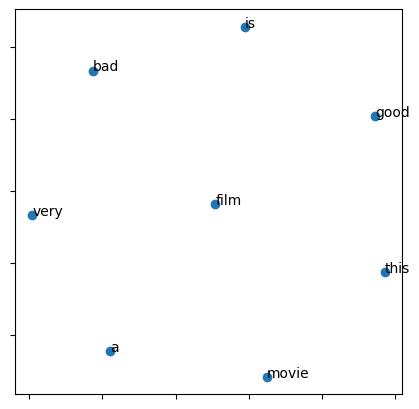

In [183]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.vectors
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(vocabs)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))

ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [77]:
#データ初期化
x_train, y_train = train_review.data, train_review.target
x_test, y_test = test_review.data, test_review.target

In [199]:
import re

#前処理
x_train = [i.replace('<br />', '') for i in x_train]
x_train = [i.replace('.', '') for i in x_train]
x_train = [re.sub('[^a-zA-Z0-9 \n\.]', '', i)  for i in x_train ]
x_train =  [i.lower()  for i in x_train ]

x_train_words = []

for i in range(len(x_train)):
    #キーワード毎に区切り
    x_train_words.append(x_train[i].split(' '))

In [233]:
# from collections import Counter
# collections.Counter(x_train_words)



24903


<ipython-input-233-7737f3912352>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(x_train_words)


# 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [242]:
from gensim.models import Word2Vec

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#  vector_size: 圧縮次元数
# min_count: 出現頻度の低いものをカットする
# window: 前後の単語を拾う際の窓の広さを決める
# iter: 機械学習の繰り返し回数(デフォルト:5)十分学習できていないときにこの値を調整する
# model.wv.most_similarの結果が1に近いものばかりで、model.dict['wv']のベクトル値が小さい値ばかりの 
# ときは、学習回数が少ないと考えられます。
# その場合、iterの値を大きくして、再度学習を行います。

model = word2vec.Word2Vec(x_train_words, vector_size=10, window=5, min_count=1,  )
model.build_vocab(x_train_words) # 準備
a = np.array(x_train_words) #total_examples用
model.train(x_train_words, total_examples=np.unique(a).size, epochs=5) # 学習

# text_word: 対象の単語列
# total_examples: 対象の単語列の要素数
# epochs: 学習回数

#ベクトル値確認のためのコード
# for vocab in model.wv.key_to_index:
#   print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

2021-08-26 17:53:02,571 : INFO : collecting all words and their counts
2021-08-26 17:53:02,573 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-08-26 17:53:02,988 : INFO : PROGRESS: at sentence #10000, processed 2307811 words, keeping 82834 word types
2021-08-26 17:53:03,314 : INFO : PROGRESS: at sentence #20000, processed 4596231 words, keeping 124448 word types
2021-08-26 17:53:03,528 : INFO : collected 142153 word types from a corpus of 5742548 raw words and 25000 sentences
2021-08-26 17:53:03,528 : INFO : Creating a fresh vocabulary
2021-08-26 17:53:04,018 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 142153 unique words (100.0%% of original 142153, drops 0)', 'datetime': '2021-08-26T17:53:04.018900', 'gensim': '4.0.1', 'python': '3.8.11 (default, Aug  6 2021, 08:56:27) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-08-26 17:53:04,019 : INFO : Word2Vec lifecycle event {'msg': 

2021-08-26 17:53:18,444 : WARNING : sorting after vectors have been allocated is expensive & error-prone
2021-08-26 17:53:19,425 : INFO : estimated required memory for 142153 words and 10 dimensions: 82448740 bytes
2021-08-26 17:53:19,426 : INFO : resetting layer weights
2021-08-26 17:53:19,427 : INFO : Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2021-08-26T17:53:19.427350', 'gensim': '4.0.1', 'python': '3.8.11 (default, Aug  6 2021, 08:56:27) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'build_vocab'}
<ipython-input-242-6266c64add14>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.array(x_train_words) #total_examples用
2021-08-26 17:53:19,513 : WARNING : Effective 'alpha' higher than previous train

(21857752, 28712740)

# 【問題7】（アドバンス課題）ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。

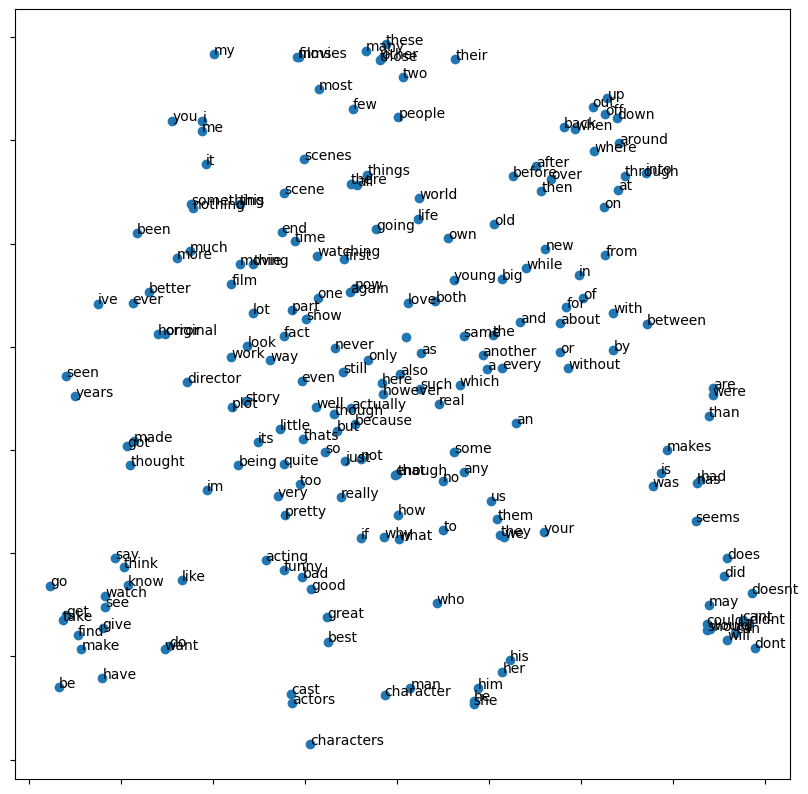

In [255]:
vocabs = model.wv.vectors[:200]
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=1000, random_state=23)
#perplexity: 各点の局所的近傍の有効数(パープレキシティが大きくなると、tsne はより多くの点を最近傍として使用する)
vectors_tsne = tsne_model.fit_transform(vocabs)

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(model.wv.index_to_key[:200]):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))

ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [246]:
model.wv.most_similar(positive="good", topn=10)

[('bad', 0.9677528738975525),
 ('lightenup', 0.9657151699066162),
 ('terrible', 0.9466913938522339),
 ('trekwars', 0.9448343515396118),
 ('cocktales', 0.9360292553901672),
 ('here', 0.9216502904891968),
 ('decent', 0.920249342918396),
 ('awful', 0.9150623083114624),
 ('great', 0.9129154086112976),
 ('cool', 0.9095495939254761)]

In [247]:
model.wv.most_similar(positive="movie", topn=10)

[('film', 0.9623318314552307),
 ('thing', 0.939887523651123),
 ('beforerelative', 0.9346057176589966),
 ('word', 0.9255742430686951),
 ('thanskip', 0.9232841730117798),
 ('crap', 0.920992910861969),
 ('problemsjust', 0.9126923084259033),
 ('nickleodeon', 0.911466658115387),
 ('fun', 0.9100617170333862),
 ('ferzan', 0.9005110263824463)]

In [250]:
model.wv.most_similar(positive="japan", topn=10)

[('sidestepping', 0.9821397066116333),
 ('moors', 0.9783433079719543),
 ('unrelenting', 0.9741962552070618),
 ('europe', 0.9733919501304626),
 ('laboriously', 0.9730835556983948),
 ('offs', 0.9727756977081299),
 ('frustrations', 0.9726070165634155),
 ('depression', 0.9725602865219116),
 ('nonlinear', 0.9719551205635071),
 ('invaluable', 0.9711582660675049)]

・word2vecは単体のモデルの名称ではない。ジャンルの総称。基本モデルは6種類<br>
・word2vecの目的は単語分散表現を得ること。分散具合でそれぞれの単語の近似性を探ることができる<br>
・one-hot表現の行列積により、次元圧縮されたものがそのまま単語分散表現となる